In [1]:
# Importando librerías
import numpy as np
import matplotlib.pyplot as plt
import time
err_vectorA = [] #vector de error
w_fA = [] #vector de pesos finales

In [2]:
#Entradas
x = np.array([[2, 6], [4, 4], [4, 10], [6, 3], [7,10], [9,8]])

print(f"\nEntradas: \n{x}")
#target
tA = np.array([[-1], [-1], [1], [-1], [1], [1]])
print(f"\nObjetivos: \n{tA}")
#aprendizaje
alpha = 0.025
print(f"Alpha:\n{alpha}\n")

#Se crea una columna de bias (-1) del tamaño de columnas de la matriz de entrada 
#Se establece el tamaño del bias que debe ser del numero de columas que tiene x
biasA = np.shape(x)[0] #[0] -> columnas      [1] -> filas
biasA = -1*np.ones((biasA, 1)) # np.ones((filas,columnas))
print(f"Bias:\n{biasA}\n")

#concatenar x con bias "Vector Aumentado
x = np.concatenate([x, biasA], axis = 1) #1 -> añade a la derecha   0 -> añade abajo
print(f"Matriz Aumentada:\n{x}\n")

#matriz de pesos
w_iA = np.array([[-0.25],[0.25], [-0.5]])

print(f"Pesos:\n{w_iA}\n")


Entradas: 
[[ 2  6]
 [ 4  4]
 [ 4 10]
 [ 6  3]
 [ 7 10]
 [ 9  8]]

Objetivos: 
[[-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]]
Alpha:
0.025

Bias:
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]

Matriz Aumentada:
[[ 2.  6. -1.]
 [ 4.  4. -1.]
 [ 4. 10. -1.]
 [ 6.  3. -1.]
 [ 7. 10. -1.]
 [ 9.  8. -1.]]

Pesos:
[[-0.25]
 [ 0.25]
 [-0.5 ]]



In [3]:
#%% Regla Delta
ticA = time.time() #Iniciamos cronometro

# Producto vectorial punto
a = np.dot(x, w_iA)
print(f"a:\n{a}\n")

#Funcion Lineal
yA = a
print(f"y:\n{yA}\n")

# Función de costo -- MSE Error cuadrático medio
errA = np.sum(0.5 * (tA - yA) ** 2)
err_vectorA.append(errA)
print(f"Error inicial:\n{errA}\n")

epochA = 0
epocas = 500

a:
[[ 1.5 ]
 [ 0.5 ]
 [ 2.  ]
 [-0.25]
 [ 1.25]
 [ 0.25]]

y:
[[ 1.5 ]
 [ 0.5 ]
 [ 2.  ]
 [-0.25]
 [ 1.25]
 [ 0.25]]

Error inicial:
5.34375



In [4]:
for i in range(epocas):
  epochA += 1
  #print(f"Epoca: {epochA}\n")

  for i in range(np.shape(x)[0]): #Repetir segun la cantidad de filas de x
    # Producto punto
    a = np.dot(x[i], w_iA)

    #Funcion lineal
    yA[i] = a

    # Actualización de pesos
    x_T = np.reshape(x[i], (len(w_iA), 1)) #REACOMODA np.reshape(matriz,(filas,columnas))
    w_nA = w_iA + alpha * (tA[i] - yA[i]) * x_T
    w_iA = w_nA
    #print(f"Peso nuevo:\n{w_i}\n")
 
  # Función de costo 

  errA = (np.sum(0.5 * (tA - yA)**2)) / len(tA)
  err_vectorA.append(errA)
  print(f"Error:\n{errA}\n")
  #Se añade al vector de pesos
  w_fA.append(w_iA)
  #print(f"Vector de Pesos Finales:\n{w_fA}\n")

print("\tEntrenamiento Adaline\n")
print(f"Error final:\n{errA}\n")
print(f"Vector de Pesos Finales:\n{w_iA}\n")

tocA = time.time() #Paro cronometro

Epoca: 1

Error:
1.756538782418092

Epoca: 2

Error:
2.481012486404685

Epoca: 3

Error:
4.03073790277801

Epoca: 4

Error:
2.3925471127293636

Epoca: 5

Error:
3.7131034667430867

Epoca: 6

Error:
2.280877835303536

Epoca: 7

Error:
3.4240518288705384

Epoca: 8

Error:
2.1719028086565717

Epoca: 9

Error:
3.1608033079856654

Epoca: 10

Error:
2.0658504572229375

Epoca: 11

Error:
2.920628706115553

Epoca: 12

Error:
1.9629119650876061

Epoca: 13

Error:
2.701137137554616

Epoca: 14

Error:
1.863243209129525

Epoca: 15

Error:
2.5002289592453337

Epoca: 16

Error:
1.7669655953373733

Epoca: 17

Error:
2.3160557620892974

Epoca: 18

Error:
1.6741678090672298

Epoca: 19

Error:
2.1469863259451336

Epoca: 20

Error:
1.584908152861517

Epoca: 21

Error:
1.9915775966563205

Epoca: 22

Error:
1.4992172271929975

Epoca: 23

Error:
1.8485498987472557

Epoca: 24

Error:
1.417100773425054

Epoca: 25

Error:
1.7167657262283464

Epoca: 26

Error:
1.3385425478828445

Epoca: 27

Error:
1.59521156089

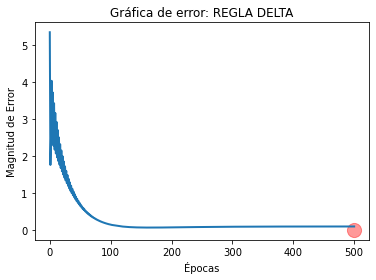

In [5]:
#%% Plotting Error -- Graph
plt.figure(0)
plt.plot(err_vectorA, linewidth = 2)
plt.title('Gráfica de error: REGLA DELTA')
plt.ylabel('Magnitud de Error')
plt.xlabel('Épocas')
plt.scatter(len(err_vectorA) - 1, 0, color = 'r', s = 200, marker = 'o', alpha = 0.4)
plt.show()

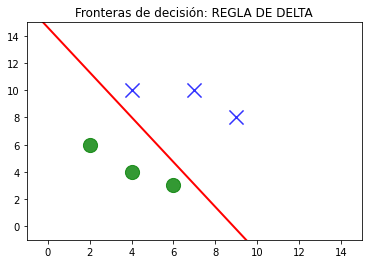

In [6]:
#Plotting Decision Boundaries
plt.xlim([-1.0, 15.0])
plt.ylim([-1.0, 15.0])

patterns = np.unique(tA) #Encuentra los elementos únicos de la matriz t

for patt in patterns:
  pos = np.where(patt == tA)[0] # np.where(TRUE)[0]
  if patt == -1:
    plt.scatter(x[pos, 0], x[pos, 1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
  else:
    plt.scatter(x[pos, 0], x[pos, 1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

x1A = np.linspace(-1, 15)
x2A = w_iA[2] / w_iA[1] - (x1A * w_iA[0]) / w_iA[1]


plt.figure(1)
plt.plot(x1A, x2A, 'red', linewidth = 2)
plt.title('Fronteras de decisión: REGLA DE DELTA')
plt.show()

In [7]:
#Pesos Finales
print('\nPesos finales: ')
for i in range(1):
    resA = str(w_iA)
    print(resA)
    print()

#%% Displaying Results
aA = np.dot(x, w_iA)
yA= aA


print('REGLA DELTA')
print('Meta:    Predicción:')
for i in range(len(yA)):
    resA = str(tA[i]) + '--------' + str(yA[i])
    print(resA)

print(f'\nTiempo requerido ADALINE: {tocA - ticA:.5f} ms.')
print(f'\nÉpocas requeridas: {epochA}.\n')


Pesos finales: 
[[0.50784435]
 [0.30789657]
 [4.50158229]]

REGLA DELTA
Meta:    Predicción:
[-1]--------[-1.63851418]
[-1]--------[-1.23861862]
[1]--------[0.60876079]
[-1]--------[-0.53082649]
[1]--------[2.13229384]
[1]--------[2.5321894]

Tiempo requerido ADALINE: 0.15599 ms.

Épocas requeridas: 500.



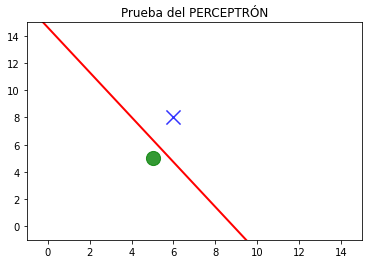

In [8]:
#Prueba
# Plotting Decision Boundaries
plt.xlim([-1.0, 15.0])
plt.ylim([-1.0, 15.0])


plt.scatter(5, 5, color = 'g', s = 200, marker = 'o', alpha = 0.8)
plt.scatter(6, 8, color = 'b', s = 200, marker = 'x', alpha = 0.8)

x1 = np.linspace(-1, 15)
x2 = w_iA[2] / w_iA[1] - (x1 * w_iA[0]) / w_iA[1]

plt.plot(x1, x2, 'red', linewidth = 2)
plt.title('Prueba de Adaline')
plt.show()